In [2]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt
import datasets
from sklearn.metrics import accuracy_score,hamming_loss
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
import string

In [27]:
dataset = datasets.load_dataset('ucberkeley-dlab/measuring-hate-speech', 'binary')   
df = dataset['train'].to_pandas()

Found cached dataset parquet (/home/tathagat/.cache/huggingface/datasets/ucberkeley-dlab___parquet/ucberkeley-dlab--measuring-hate-speech-c32713cabe528196/0.0.0/2a3b91fbd88a2c90d1dbbb32b460cf621d31bd5b05b934492fdef7d8d6f236ec)


  0%|          | 0/1 [00:00<?, ?it/s]

In [37]:
cols_to_convert = df.select_dtypes(include=['int', 'float', 'bool']).columns[df.select_dtypes(include=['int', 'float', 'bool']).nunique()<=5]
cols_to_convert

Index(['sentiment', 'respect', 'insult', 'humiliate', 'status', 'dehumanize',
       'violence', 'genocide', 'attack_defend', 'hatespeech',
       ...
       'annotator_religion_hindu', 'annotator_religion_jewish',
       'annotator_religion_mormon', 'annotator_religion_muslim',
       'annotator_religion_nothing', 'annotator_religion_other',
       'annotator_sexuality_bisexual', 'annotator_sexuality_gay',
       'annotator_sexuality_straight', 'annotator_sexuality_other'],
      dtype='object', length=113)

In [38]:
# df[df.select_dtypes(include=['int', 'float', 'bool']).columns[df.select_dtypes(include=['int', 'float', 'bool']).nunique()<=5]].astype(int)
df[cols_to_convert] = df[cols_to_convert].astype(int)
df.head()

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
1,39773,2790,2,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,1,0
2,47101,3379,3,4,4,4,4,4,4,0,...,0,0,0,0,1,0,0,0,1,0
3,43625,7365,3,2,3,2,1,2,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12538,488,0,4,4,4,4,4,4,4,...,0,0,0,0,0,0,0,0,1,0


In [39]:
df.to_csv('../data/data.csv',index=False)

In [6]:
df.head()

,comment_id,annotator_id,platform,sentiment,respect,insult,humiliate,status,dehumanize,violence,...,annotator_religion_hindu,annotator_religion_jewish,annotator_religion_mormon,annotator_religion_muslim,annotator_religion_nothing,annotator_religion_other,annotator_sexuality_bisexual,annotator_sexuality_gay,annotator_sexuality_straight,annotator_sexuality_other
0,47777,10873,3,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
1,39773,2790,2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
2,47101,3379,3,4.0,4.0,4.0,4.0,4.0,4.0,0.0,...,False,False,False,False,True,False,False,False,True,False
3,43625,7365,3,2.0,3.0,2.0,1.0,2.0,0.0,0.0,...,False,False,False,False,False,False,False,False,True,False
4,12538,488,0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,...,False,False,False,False,False,False,False,False,True,False


In [7]:
target_cols = [col for col in df.columns if 'target' in col]
target_cols

['target_race_asian',
 'target_race_black',
 'target_race_latinx',
 'target_race_middle_eastern',
 'target_race_native_american',
 'target_race_pacific_islander',
 'target_race_white',
 'target_race_other',
 'target_race',
 'target_religion_atheist',
 'target_religion_buddhist',
 'target_religion_christian',
 'target_religion_hindu',
 'target_religion_jewish',
 'target_religion_mormon',
 'target_religion_muslim',
 'target_religion_other',
 'target_religion',
 'target_origin_immigrant',
 'target_origin_migrant_worker',
 'target_origin_specific_country',
 'target_origin_undocumented',
 'target_origin_other',
 'target_origin',
 'target_gender_men',
 'target_gender_non_binary',
 'target_gender_transgender_men',
 'target_gender_transgender_unspecified',
 'target_gender_transgender_women',
 'target_gender_women',
 'target_gender_other',
 'target_gender',
 'target_sexuality_bisexual',
 'target_sexuality_gay',
 'target_sexuality_lesbian',
 'target_sexuality_straight',
 'target_sexuality_other'

In [8]:
annotator_cols = [col for col in df.columns if 'annotator' in col]
annotator_cols

['annotator_id',
 'annotator_severity',
 'annotator_infitms',
 'annotator_outfitms',
 'annotator_gender',
 'annotator_trans',
 'annotator_educ',
 'annotator_income',
 'annotator_ideology',
 'annotator_gender_men',
 'annotator_gender_women',
 'annotator_gender_non_binary',
 'annotator_gender_prefer_not_to_say',
 'annotator_gender_self_describe',
 'annotator_transgender',
 'annotator_cisgender',
 'annotator_transgender_prefer_not_to_say',
 'annotator_education_some_high_school',
 'annotator_education_high_school_grad',
 'annotator_education_some_college',
 'annotator_education_college_grad_aa',
 'annotator_education_college_grad_ba',
 'annotator_education_professional_degree',
 'annotator_education_masters',
 'annotator_education_phd',
 'annotator_income_<10k',
 'annotator_income_10k-50k',
 'annotator_income_50k-100k',
 'annotator_income_100k-200k',
 'annotator_income_>200k',
 'annotator_ideology_extremeley_conservative',
 'annotator_ideology_conservative',
 'annotator_ideology_slightly_

In [9]:
remaining_cols = list(set(df.columns) - set(annotator_cols) - set(target_cols))
remaining_cols

['hatespeech',
 'sentiment',
 'respect',
 'attack_defend',
 'hate_speech_score',
 'infitms',
 'hypothesis',
 'humiliate',
 'genocide',
 'insult',
 'comment_id',
 'violence',
 'std_err',
 'status',
 'outfitms',
 'text',
 'platform',
 'dehumanize']

In [10]:
df[remaining_cols]

,hatespeech,sentiment,respect,attack_defend,hate_speech_score,infitms,hypothesis,humiliate,genocide,insult,comment_id,violence,std_err,status,outfitms,text,platform,dehumanize
0,0.0,0.0,0.0,0.0,-3.90,0.81,-1.130178,0.0,0.0,0.0,47777,0.0,0.34,2.0,1.88,Yes indeed. She sort of reminds me of the elde...,3,0.0
1,0.0,0.0,0.0,2.0,-6.52,0.96,-1.146973,0.0,0.0,0.0,39773,0.0,1.00,2.0,0.43,The trans women reading this tweet right now i...,2,0.0
2,2.0,4.0,4.0,4.0,0.36,0.90,-0.207369,4.0,0.0,4.0,47101,0.0,0.31,4.0,0.74,Question: These 4 broads who criticize America...,3,4.0
3,0.0,2.0,3.0,3.0,0.26,0.81,-0.055536,1.0,0.0,2.0,43625,0.0,0.29,2.0,0.68,It is about time for all illegals to go back t...,3,0.0
4,2.0,4.0,4.0,3.0,1.54,0.76,0.104225,4.0,1.0,4.0,12538,4.0,0.51,4.0,0.63,For starters bend over the one in pink and kic...,0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135551,0.0,1.0,1.0,2.0,-4.88,0.16,-0.036250,0.0,0.0,0.0,37080,0.0,0.69,2.0,0.11,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...,2,0.0
135552,0.0,2.0,0.0,1.0,-4.40,1.30,-0.974684,0.0,0.0,0.0,22986,0.0,0.35,2.0,0.43,Millions of #Yemen-is participated in mass ral...,2,0.0
135553,0.0,1.0,1.0,1.0,-2.49,1.11,-0.491960,1.0,0.0,1.0,21008,0.0,0.37,1.0,1.29,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...,2,0.0
135554,0.0,2.0,0.0,2.0,-4.40,1.30,-0.974684,0.0,0.0,0.0,22986,0.0,0.35,2.0,0.43,Millions of #Yemen-is participated in mass ral...,2,0.0


In [11]:
df[target_cols].head()

,target_race_asian,target_race_black,target_race_latinx,target_race_middle_eastern,target_race_native_american,target_race_pacific_islander,target_race_white,target_race_other,target_race,target_religion_atheist,...,target_age_other,target_age,target_disability_physical,target_disability_cognitive,target_disability_neurological,target_disability_visually_impaired,target_disability_hearing_impaired,target_disability_unspecific,target_disability_other,target_disability
0,True,True,True,True,True,True,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
bool_cols = df.select_dtypes(include=bool).columns
df[bool_cols] = df[bool_cols].astype(int)

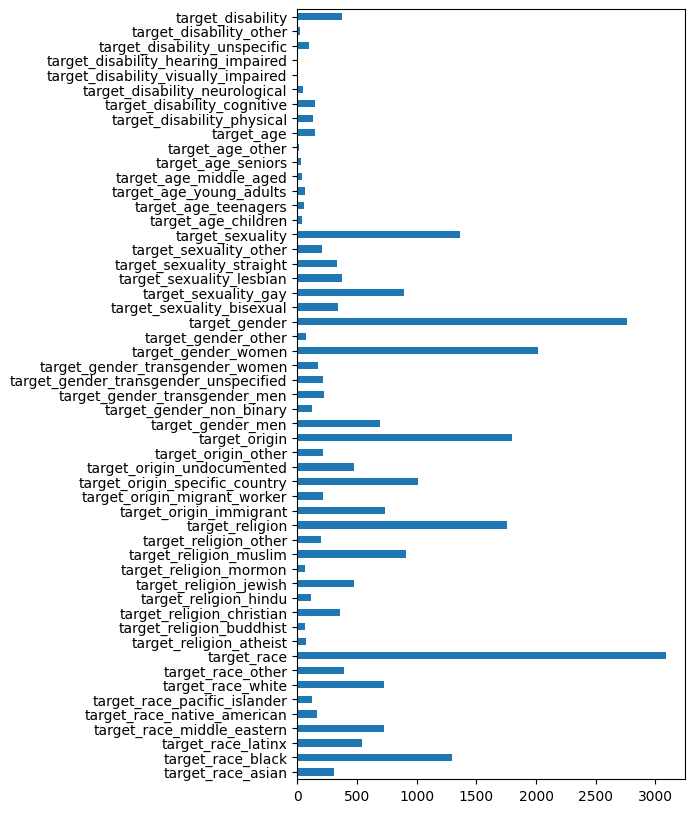

In [25]:
plt.figure(figsize=(5,10))
df[df['hatespeech']==1.0][target_cols].sum().plot(kind='barh')
# plt.xticks(rotation=10)
plt.show()

In [31]:
df[remaining_cols].nunique()

hatespeech               3
sentiment                5
respect                  5
attack_defend            5
hate_speech_score     1255
infitms                413
hypothesis           39460
humiliate                5
genocide                 5
insult                   5
comment_id           39565
violence                 5
std_err                 75
status                   5
outfitms               639
text                 39565
platform                 4
dehumanize               5
dtype: int64

In [67]:
labels = df[df[remaining_cols].columns[df[remaining_cols].nunique()<=5]].select_dtypes(exclude=int).columns
df[labels] = df[labels].astype(int)

In [70]:
df[remaining_cols].select_dtypes(exclude=int)

,hate_speech_score,infitms,hypothesis,std_err,outfitms,text
0,-3.90,0.81,-1.130178,0.34,1.88,Yes indeed. She sort of reminds me of the elde...
1,-6.52,0.96,-1.146973,1.00,0.43,The trans women reading this tweet right now i...
2,0.36,0.90,-0.207369,0.31,0.74,Question: These 4 broads who criticize America...
3,0.26,0.81,-0.055536,0.29,0.68,It is about time for all illegals to go back t...
4,1.54,0.76,0.104225,0.51,0.63,For starters bend over the one in pink and kic...
...,...,...,...,...,...,...
135551,-4.88,0.16,-0.036250,0.69,0.11,عاجل سماحة #السيد_عبدالملك_بدرالدين_الحوثي نص...
135552,-4.40,1.30,-0.974684,0.35,0.43,Millions of #Yemen-is participated in mass ral...
135553,-2.49,1.11,-0.491960,0.37,1.29,@AbeShinzo @realDonaldTrump @shinzoabe 独裁者は行きま...
135554,-4.40,1.30,-0.974684,0.35,0.43,Millions of #Yemen-is participated in mass ral...


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
def make_wordcloud(df):
    comment_words=""
    for val in df.text: 
        val = str(val).lower()
        comment_words += " ".join(val)+" "

    # print(comment_words[:100])
    wordcloud = WordCloud(width = 800, height = 800,
                stopwords=STOPWORDS,
                background_color ='white',min_font_size = 10).generate(comment_words)
  
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)

    plt.show()

In [ ]:
make_wordcloud(df[df['label']==0])